# Modelo de Regrassão linear para reservas em hoteis

#### Passos:

- 1 - Carregando bibliotecas
- 2 - Análise exploratória de dados
- 3 - Treinamento e teste da regressão linear
- 4 - Visualização dos resultados
- 5 - Diagnostico da regressão  

In [109]:
# Carregando bibliotecas

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

get_ipython().run_line_magic('matplotlib', 'inline')

In [110]:
# Importando a base de dados e fazendo um check inicial

# Mudando o diretório de trabalho
import os 
os.chdir("E:\\Base de dados")

df1 = pd.read_csv("listings.csv",sep = ",")

df1.shape

df1.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96599,-43.17940,Entire home/apt,350,5,267,2021-12-03,1.92,1,257,10,NaN
1,24480,"Nice and cozy near Ipanema Beach, w/ home office",99249,Goya,NaN,Ipanema,-22.98405,-43.20189,Entire home/apt,296,3,85,2018-02-14,0.62,1,107,0,NaN
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97735,-43.19105,Entire home/apt,387,3,238,2020-02-15,1.69,1,206,0,NaN
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98839,-43.19232,Entire home/apt,172,2,181,2020-03-15,1.82,1,207,0,NaN
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98107,-43.19136,Entire home/apt,260,3,378,2021-12-05,2.76,1,58,32,NaN
5,48305,Bright 6bed Penthouse Seconds from Beach,70933,Goitaca,NaN,Ipanema,-22.98591,-43.20302,Entire home/apt,4217,2,91,2021-12-06,0.69,9,325,17,NaN
6,48726,Rio de Janeiro Copacabana Ipanema,221941,Vana,NaN,Copacabana,-22.98528,-43.19264,Private room,114,3,42,2019-08-08,0.83,2,26,0,NaN
7,48901,Confortable 4BD 3.5BT Atlantic avenue,222884,Marcio,NaN,Copacabana,-22.96574,-43.17514,Entire home/apt,2015,2,8,2021-12-10,0.10,2,5,4,NaN
8,49179,Djalma Ocean View Studio with Amazing Views #100A,224192,David,NaN,Copacabana,-22.97910,-43.19008,Entire home/apt,380,3,106,2021-12-19,0.96,36,161,18,NaN
9,50294,Ipanema Beach Block Suites Just Seconds from t...,70933,Goitaca,NaN,Ipanema,-22.98584,-43.20305,Entire home/apt,2310,2,74,2021-07-07,0.58,9,330,1,NaN


In [111]:
df1.tail(20)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
24529,53952770,Proximo da praia amplo e confortável,257601767,Raquel Grama,NaN,Copacabana,-22.973173,-43.190286,Entire home/apt,1262,3,0,NaN,NaN,32,364,0,NaN
24530,53952919,"Omar do Rio - SC 86/712: Modern 1BDR, Internet...",6000862,Omar Do Rio,NaN,Copacabana,-22.971746,-43.188052,Entire home/apt,634,1,0,NaN,NaN,93,258,0,NaN
24531,53953294,Modern loft in Alto-Leblon,1982737,Estadia,NaN,Leblon,-22.983694,-43.231939,Entire home/apt,775,1,0,NaN,NaN,78,285,0,NaN
24532,53953860,"Omar do Rio - FS 108/601: Cozy 3bdr, 03 minute...",6000862,Omar Do Rio,NaN,Copacabana,-22.982610,-43.193580,Entire home/apt,1354,1,0,NaN,NaN,93,363,0,NaN
24533,53953902,"Lindo apartamento, vista Cristo,até 4 pessoas",13121589,Patricia,NaN,Copacabana,-22.966892,-43.185781,Private room,463,3,0,NaN,NaN,14,339,0,NaN
24534,53953997,Apartamento amplo e aconchegante perto de tudo,381305637,Mariah,NaN,Estácio,-22.920537,-43.206852,Private room,320,1,0,NaN,NaN,1,361,0,NaN
24535,53954124,Apartamento para Ano Novo - Estácio,48515812,Max,NaN,Estácio,-22.915285,-43.207542,Entire home/apt,699,3,0,NaN,NaN,1,365,0,NaN
24536,53954975,apartamento aconchegante no centro do Rio,436373788,Nelci,NaN,Centro,-22.910892,-43.183806,Entire home/apt,357,4,0,NaN,NaN,1,365,0,NaN
24537,53955388,TIJUCA APTO 3 QTS LADO METRÔ,28470011,Claudio,NaN,Tijuca,-22.929861,-43.242330,Entire home/apt,526,5,0,NaN,NaN,6,363,0,NaN
24538,53956158,Lugar aconchegante em Botafogo,381221659,Solange,NaN,Botafogo,-22.943889,-43.183458,Entire home/apt,580,2,0,NaN,NaN,1,364,0,NaN


---------------


### Tratamento de dados

In [112]:
# Missing Values

df1_filtrado = df1.dropna(axis= 1)

In [113]:

df1_filtrado = df1_filtrado.set_index("id")

In [114]:
df1_filtrado.tail(50)

,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,,,,,,,,,,,
53939927,41846354,Tijuca,-22.940138,-43.247066,Private room,221,1,1,6,365,1
53940148,48580323,Taquara,-22.927969,-43.377355,Entire home/apt,322,1,0,1,362,0
53940192,7834157,Vidigal,-22.995681,-43.242212,Entire home/apt,130,1,0,2,344,0
53940378,27994357,Ipanema,-22.983383,-43.206096,Entire home/apt,1100,6,0,39,15,0
53940501,41086383,Copacabana,-22.971792,-43.186134,Entire home/apt,743,1,0,2,301,0
53940609,196401616,Leme,-22.962182,-43.171261,Entire home/apt,400,1,0,1,362,0
53940619,93612056,Barra da Tijuca,-23.005865,-43.429776,Entire home/apt,240,3,0,1,29,0
53940781,54899116,Glória,-22.920592,-43.178751,Entire home/apt,386,5,0,1,363,0
53940794,37427403,Copacabana,-22.982105,-43.194820,Shared room,200,3,0,2,365,0


------------------

### Analise exploratória de dados

In [115]:
df1_filtrado["number_of_reviews_ltm"].describe()

count    24549.000000
mean         3.584179
std          8.345567
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max        267.000000
Name: number_of_reviews_ltm, dtype: float64

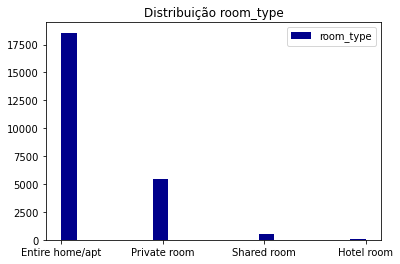

In [118]:
# Histograma 

plt.hist(df1_filtrado["room_type"], bins = 20
        , histtype= "stepfilled"
        , color= "darkblue"
        , edgecolor = "none"
        , label = "room_type");

plt.legend()
plt.title("Distribuição room_type");

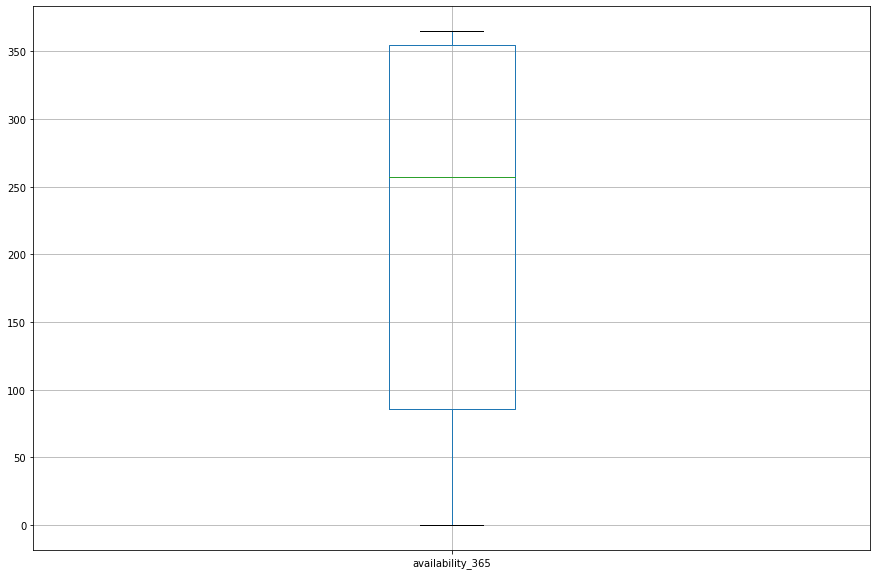

In [119]:
# Pode-se ver no boxplot que os preços orbitam mais nos outliers
df1.boxplot(column=["availability_365"],figsize=(15,10));

In [122]:
# Ajustando a variavel Label

df1_filtrado["room_type"] = np.where(df1_filtrado["room_type"] == "Entire home/apt", 1, 0)

In [125]:
# Média de preco e da avaliação 365 em relação aos bairros 
df2 = df1_filtrado.copy()
df3 = df1_filtrado.groupby("neighbourhood")["price","availability_365", "minimum_nights","number_of_reviews_ltm", "room_type"].mean()
df3.head(20)

<ipython-input-125-4dcf0c4d3c76>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = df1_filtrado.groupby("neighbourhood")["price","availability_365", "minimum_nights","number_of_reviews_ltm", "room_type"].mean()


,price,availability_365,minimum_nights,number_of_reviews_ltm,room_type
neighbourhood,,,,,
Abolição,320.250000,155.250000,7.250000,0.000000,0.750000
Acari,250.000000,300.000000,1.000000,0.000000,1.000000
Alto da Boa Vista,2391.451613,280.548387,2.129032,5.129032,0.709677
Anchieta,2069.000000,273.333333,2.333333,0.000000,0.666667
Andaraí,1202.297297,275.945946,3.648649,0.972973,0.432432
Anil,519.547619,276.761905,3.880952,0.214286,0.595238
Bancários,310.666667,289.666667,1.333333,8.000000,0.333333
Bangu,1296.090909,323.000000,5.727273,1.090909,0.727273
Barra da Tijuca,1227.169956,220.729360,5.712042,3.434555,0.801853


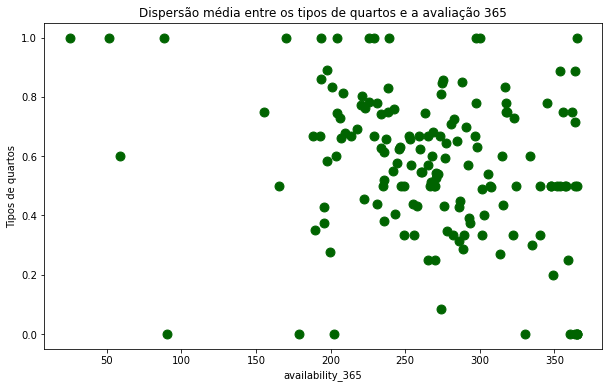

In [130]:
# Nas localidades onde se tem entire home/apt temos uma avaliação 365 mais concentrada.

plt.figure(figsize = (10, 6))
plt.scatter(df3["availability_365"], df3["room_type"], s = 80, color = "darkgreen")
plt.title('Dispersão média entre os tipos de quartos e a avaliação 365')
plt.xlabel('availability_365')
plt.ylabel('Tipos de quartos');

-------------

### Removendo as correlações

In [131]:
# Analisando a correlação das variaveis com o nosso alvo

correl = df3.corr()['room_type'].drop('room_type')

correl

price                    0.155445
availability_365        -0.276143
minimum_nights           0.079231
number_of_reviews_ltm    0.374389
Name: room_type, dtype: float64

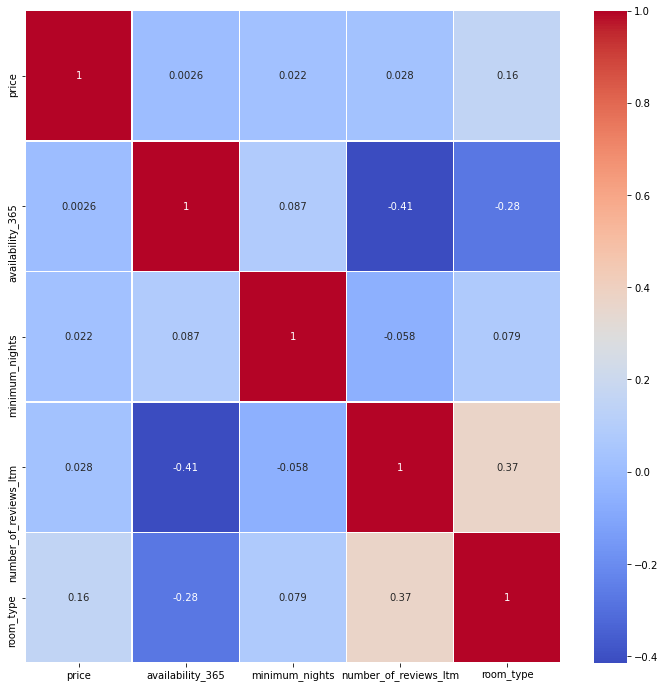

In [132]:
# Visualizando as correlações - geralmente heat maps são o melhor tipo de visualização

correl_hm = df3.corr() # corr()= correlação

fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(correl_hm, cmap= "coolwarm", annot=True, linewidths=.6, ax = ax);

In [133]:
# Vamos eliminar as correlações e reescrever a base 

correl_total = df3.corr().abs() # Abs() = pega os numeros absolutos das correlações das variaveis.

superior = correl_total.where(np.triu(np.ones(correl_total.shape), k = 1).astype(np.bool)) # np.triu é o numpy pegando o triangulo superior do heatmap;

var_remove = [variaveis for variaveis in superior.columns if any(superior[variaveis] > 0.5)] # eliminando as variaveis do triangulo superiores a 0.5

wine = df3.drop(df3[var_remove], axis=1)

<ipython-input-133-21d982ea2a0f>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  superior = correl_total.where(np.triu(np.ones(correl_total.shape), k = 1).astype(np.bool)) # np.triu é o numpy pegando o triangulo superior do heatmap;


In [134]:
df3.head()

,price,availability_365,minimum_nights,number_of_reviews_ltm,room_type
neighbourhood,,,,,
Abolição,320.250000,155.250000,7.250000,0.000000,0.750000
Acari,250.000000,300.000000,1.000000,0.000000,1.000000
Alto da Boa Vista,2391.451613,280.548387,2.129032,5.129032,0.709677
Anchieta,2069.000000,273.333333,2.333333,0.000000,0.666667
Andaraí,1202.297297,275.945946,3.648649,0.972973,0.432432


----------------

### Regressão Linear


In [135]:
# Separando os dados com as variaveis em x e o alvo em y

x = wine.drop(['room_type'],axis=1)
y = wine['room_type']

In [136]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.50)

In [137]:
# Treinando o modelo

lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [138]:
# Predições p/ o treinamento e teste

y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

---------------

### Métricas de avaliação: MAE, R2 e RMSE

In [140]:
# Avaliação dos resultados

import sklearn.metrics as metrics
from math import sqrt

MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
R2_train = metrics.r2_score(y_train, y_pred_train) # Coeficiente de determinação
RMSE_train = sqrt(metrics.mean_squared_error(y_train, y_pred_train))

print("---- Avaliação do treinamento -----")
print("MAE: ", round(MAE_train,2))
print('R2: ', round(R2_train,2))
print('RMSE: ', round(RMSE_train,2))

MAE_test = metrics.mean_absolute_error(y_test, y_pred_test) 
R2_test = metrics.r2_score(y_test, y_pred_test)
RMSE_test = sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print("")
print("----- Avaliaçao do teste -----")
print("MAE: ", round(MAE_test,2))
print('R2: ', round(R2_test,2))
print('RMSE: ', round(RMSE_test,2))

---- Avaliação do treinamento -----
MAE:  0.15
R2:  0.31
RMSE:  0.2

----- Avaliaçao do teste -----
MAE:  0.19
R2:  -0.02
RMSE:  0.25


In [146]:
# Olhando apenas para a base de teste

print("A média dos tipos de quartos da base é: ")
print(round(y_test.mean(),2))
print()
print("O percentual do MAE em relação á média da base: ")
print(round(metrics.mean_squared_error(y_test, y_pred_test)/y_test.mean()*100,2))

A média dos tipos de quartos da base é: 
0.59

O percentual do MAE em relação á média da base: 
10.36
